In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools

In [88]:
avgs_df = pd.read_csv(os.path.join("data","lebron_james_avg_stats.csv"))
avgs_df.head()

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,39.5,7.9,18.9,...,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,42.4,9.9,21.1,...,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,42.5,11.1,23.1,...,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,40.9,9.9,20.8,...,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,40.4,10.6,21.9,...,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0


In [89]:
avgs_df["Age"].max()

35.0

In [90]:
def age_cat(age):
    if age < 27:
        return "young"
    elif age < 34:
        return "middle-aged"
    return "older"

In [91]:
avgs_df["Age Category"] = avgs_df["Age"].apply(lambda x: age_cat(x))

<h2>Numerical Analysis</h2>

In [92]:
imprt_cols = ["TRB","AST","PTS","FG%","Age Category"]
imprt_cols

['TRB', 'AST', 'PTS', 'FG%', 'Age Category']

In [93]:
imprt_df = avgs_df[imprt_cols]

<Figure size 1440x1440 with 0 Axes>

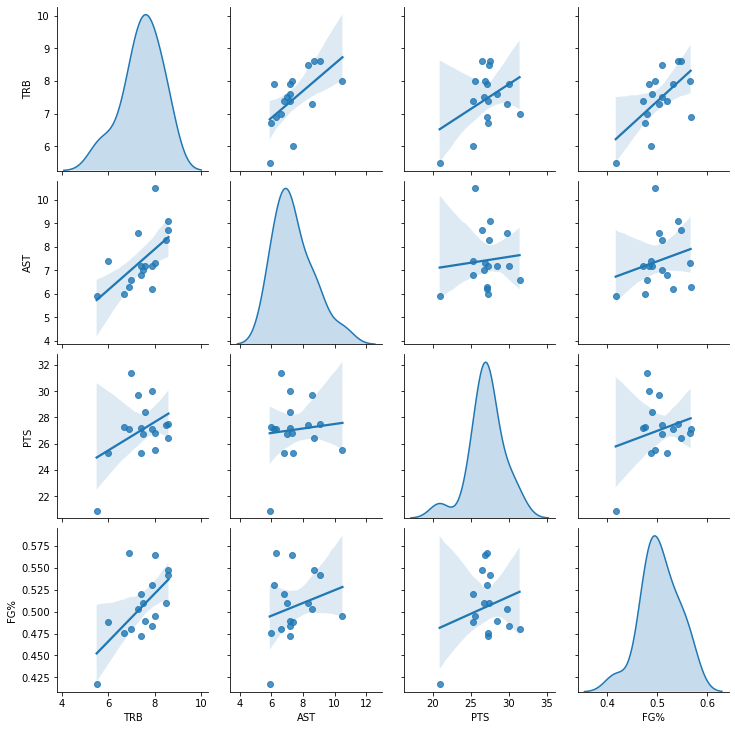

In [94]:
fig = plt.figure(1,(20,20))
sns.pairplot(imprt_df,diag_kind="kde",kind="reg")

<h4>Insights</h4>
<ul>
    <li>Amongst all the basic statistics, Lebron James has a positive correlation with all other statistics</li>
    <li>Overall, FG% has a rather normal distribution</li>
    <li>Assists has a slightly left-skew and Total Rebounds has a slight right-skew</li>
    <li>Points is bi-modal with a peak at about 28 points per game</li>
</ul>

<h4>Because the pairplot has positive correlations amongst all the basic numerical statistics, we can examine how these patterns change by age category.</h4>

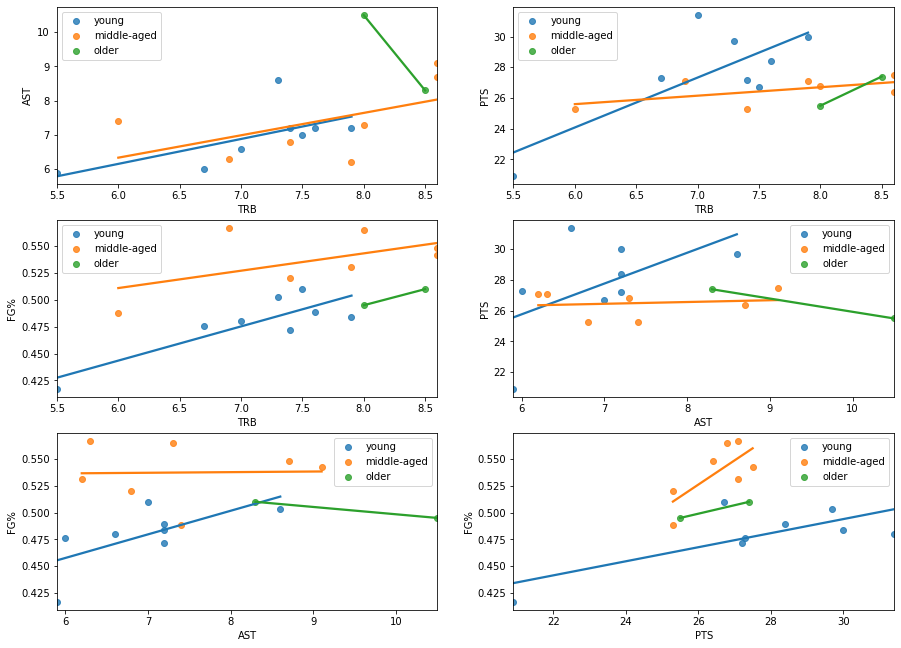

In [95]:
plt.figure(1,(15,15))
imprt_cols.remove("Age Category")
basic_num_combos = itertools.combinations(imprt_cols,2)
basic_num_combos = [basic_num_combo for basic_num_combo in basic_num_combos]
i = 0
for basic_num_combo in basic_num_combos:
    i += 1
    ax = plt.subplot(1+(basic_num_combos_len//2),2,i)
    for age_cat in avgs_df["Age Category"].unique():
        data = avgs_df[avgs_df["Age Category"] == age_cat]
        sns.regplot(x=basic_num_combo[0],y=basic_num_combo[1],data=data,ci=None,label=age_cat)
    ax.legend()
imprt_cols.append('Age Category')
plt.show()

<h4>Insights</h4>
<ul>
    <li>In the elder stages of his career, 3 out of the 6 statistics have a negative correlation, implying Lebron James may be specializing in certain skillsets</li>
    <li>In his the young and middle stages of his career, all the basic statistics have a positive correlation</li>
    <li>Lebron increased his average number of assists while maintaining his field goal percentage</li>
    <li>At every stage of his career, an increase in James' points per game is also complemented with an increase in field goal percentage</li>
</ul>
<i>*Note: Keep in mind that the elder age category only contain data for 3 years whereas the other 2 categories have data for at least 6 years.</i>

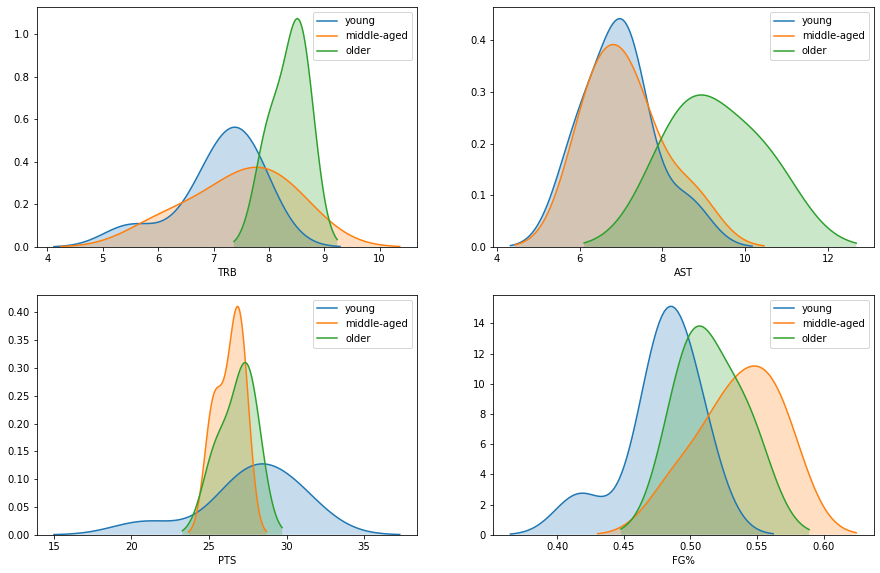

In [85]:
fig = plt.figure(1,(15,15))
i = 0
for imprt_col in imprt_cols:
    if imprt_col == "Age Category":
        continue
    i+=1
    ax = plt.subplot(1+(len(imprt_cols)//2),2,i)
    for age_cat in avgs_df["Age Category"].unique():
        data = avgs_df[avgs_df["Age Category"]==age_cat][imprt_col]
        sns.kdeplot(data,shade=True,label=age_cat)
        ax.set_xlabel(imprt_col)
plt.show()

<h4>Insights</h4>
<ul>
    <li>Lebron James' scoring statistics peaked at his younger and middle-aged stages of his career</li>
    <li>In the younger and middle stages of his career, his assists averaged about 6.5-7 assists per games, whereas in the older stages in his career, this increased to about 9 assists per game.</li>
    <li>This implies his focus slightly shifted from scoring to passsing as his career passed.</li>
    <li>His total rebounds also increased as he aged, increasing from about 7-8 rebounds per game to about 8.5 rebounds per game</li>
</ul> 

In [184]:
def corr_cats(orig_corr_df):
    corr_df = orig_corr_df.copy(deep=True)
    for row in range(len(corr_df)):
        for col in range(len(corr_df.iloc[0])):
            val = corr_df.iloc[row,col]
            neg = val < 0
            val = abs(val)
            new_val = 0
            if val < 0.1:
                pass
            elif val < 0.3:
                val = 0.3
            elif val < 0.5:
                new_val = 0.5
            elif val < 0.7:
                new_val = 0.7
            else:
                new_val = 1
            if neg:
                new_val *= -1
            corr_df.iloc[row,col] = new_val
    return corr_df

def filter_high_corr(orig_corr_df, corr_cutoff):
    corr_df = orig_corr_df.copy(deep=True)
    for row in range(len(corr_df)):
        for col in range(len(corr_df.iloc[0])):
            if corr_df.iloc[row,col] >= corr_cutoff:
                corr_df.iloc[row,col] = 1
            elif corr_df.iloc[row,col] <= -corr_cutoff:
                corr_df.iloc[row,col] = -1
            else:
                corr_df.iloc[row,col] = 0
    return corr_df

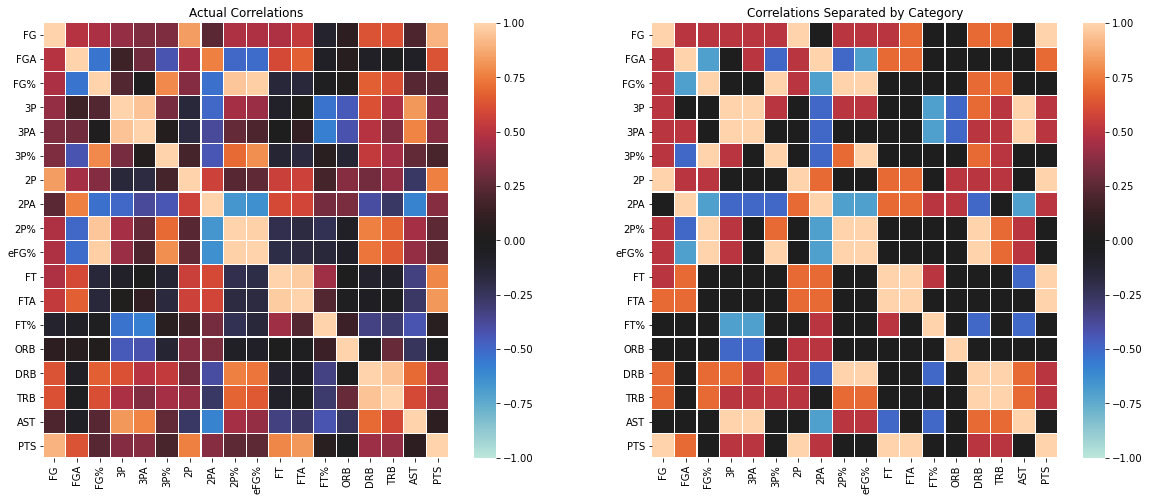

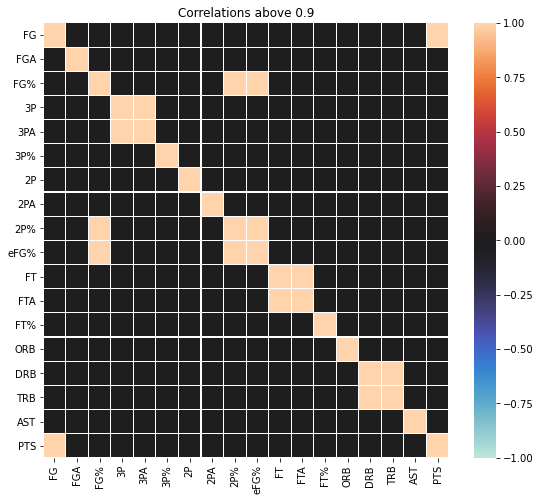

In [185]:
num_df = avgs_df.select_dtypes(exclude=["object"])
num_df.drop(["Age","G","GS","MP", "PF","TOV","BLK","STL"],axis=1,inplace=True)

corrs = num_df.corr()
fig = plt.figure(1,(20,8))
ax = plt.subplot(1,2,1)
ax.set_title("Actual Correlations")
sns.heatmap(corrs,vmin=-1,vmax=1, center=0, linewidth=0.1)

ax = plt.subplot(1,2,2)
ax.set_title("Correlations Separated by Category")
nums_corrs_cats_df = corr_cats(corrs)
sns.heatmap(nums_corrs_cats_df,vmin=-1,vmax=1, center=0, linewidth=0.1)
plt.show()

fig = plt.figure(1,(20,8))
ax = plt.subplot(1,2,1)
corr_cutoff = 0.9
ax.set_title(f"Correlations above {corr_cutoff}")
high_corr_df = filter_high_corr(corrs, corr_cutoff)
sns.heatmap(high_corr_df,vmin=-1,vmax=1, center = 0, linewidth=0.1)
plt.show()

<h4>Insights</h4>
<ul>
    <li>Field goals amde and PTS per game have an extremely high correlation</li>
    <li>FG%, 2P%, and eFG% all have above a 90% correlation with each other</li>
    <li>Three pointers made and three pointers attempted also have above a 90% correlation, this likely implies Lebron's ratio of made 3s to missed 3s remains relatively constant</li>
    <li>There is a strong correlation between total rebounds and defensive rebounds, implying Lebron gets most of rebounds defensively</li>
    <li>Overall, we can see there is not too many features that have significant correlations with others, which is ideal for machine learning</li>
</ul>
<i>*Note: The cutoff in this situation is 0.9 since this is a high enough correlation to drop a feature without losing significant insights.</i>

In [110]:
avgs_df.iloc[0,0]

'2003-04'

In [13]:
list(avgs_df.select_dtypes(exclude=["object"]).columns).remove("")

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')